<div style="
    border: 3px solid #C0C0C0; 
    border-radius: 10px; 
    padding: 15px; 
    background-color: #6F4F1F; 
    font-size: 16px; 
    text-align: left; 
    background: linear-gradient(to right, red, orange, yellow, green, blue, indigo, violet); 
    -webkit-background-clip: text; 
    color: transparent;">
    <h3 style="color: #FFFFFF; font-weight: bold; background-color: #A9A9A9; padding: 10px; border-radius: 5px; text-align: center;">Theme</h3>
    <div style="background-color: #FFFFFF; padding: 10px; border-radius: 5px; font-weight: bold; color: #000;">
        Optimizing Revenue Management for Sustainable Water Distribution: QUATECH Senegal's Customer Data Analysis to Address the Decline in Water Development Fund Revenues.
    </div>
</div>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import plotly.graph_objs as go
import statsmodels.api as sm
import scipy.cluster.hierarchy as sch
import tensorflow as tf

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import ElasticNet
from sklearn.cluster import AgglomerativeClustering
from IPython.display import HTML, display
from tensorflow import keras

2024-12-14 05:01:35.644637: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-14 05:01:35.712039: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-14 05:01:35.777302: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734152495.837232   55272 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734152495.854190   55272 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-14 05:01:36.026831: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

<div style="
    border: 3px solid #C0C0C0; 
    border-radius: 10px; 
    padding: 15px; 
    background-color: #C0C0C0; 
    font-size: 16px; 
    color: #333; 
    text-align: left;">
    <h3 style="color: #FFFFFF; font-weight: bold; background-color: #A9A9A9; padding: 10px; border-radius: 5px; text-align: center;">INTRODUCTION</h3>
    <div style="background-color: #FFFFFF; padding: 10px; border-radius: 5px; font-weight: bold; color: #000;">
        QUATECH Senegal, a subsidiary of the multinational QUATECH operating in 24 countries, has been a key player in Senegal's water sector reform since its establishment in 2016. With 45 years of expertise in water management and distribution, the company operates in the rural areas of Thiès and Diourbel, managing the exploitation, commercialization, and payment collection for several hundred boreholes entrusted by the Senegalese government. Employing 200 staff members, 33% of whom are women in management positions and 95% young professionals, QUATECH Senegal exemplifies dynamism and commitment.

Despite significant investments leading to increased volumes of water produced and distributed, a continuous decline in revenues from the Water Development Fund (FDE) has been observed. The FDE, a component of water tariffs financed by customer bills, plays a crucial role in supporting water infrastructure. This decline in revenue presents a major challenge for the organization and the authorities.

In light of this pressing issue, and in line with strategic priorities defined during the inter-ministerial council led by Prime Minister Ousmane Sonko, QUATECH Senegal is committed to identifying the causes of this decline to propose corrective measures. This need is even more critical as the integration of new boreholes, such as the GUÉRÉO site, requires swift and efficient upgrades to infrastructure and operations.

This project is set within this framework, adopting a data-driven analytical approach to understand the factors behind the decline in FDE revenues by examining consumer behavior, payment profiles, and potential regional disparities. The outcomes will guide QUATECH Senegal's strategic decisions while offering an opportunity to apply advanced statistical techniques such as regression, clustering, and neural networks to address this complex issue effectively.</div>
</div>


<div style="
    border: 3px solid #FFD700; 
    border-radius: 10px; 
    padding: 15px; 
    background-color: black; 
    font-size: 16px; 
    text-align: left;">
    <h3 style="color: #FFD700; font-weight: bold; background-color: #000000; padding: 10px; border-radius: 5px; text-align: center;">Problem Statement</h3>
    <div style="background-color: #333333; padding: 10px; border-radius: 5px; font-weight: bold; color: #FFD700;">
        What are the factors explaining the decline in reported resources for the Water Development Fund (FDE), despite an increase in the volumes of water produced and distributed?.
    </div>
</div>


<div style="
    border: 3px solid #FFA500; 
    border-radius: 12px; 
    padding: 20px; 
    background-color: #FFF8DC; 
    font-size: 16px; 
    color: #333; 
    text-align: left;">
    <h3 style="color: #FFFFFF; font-weight: bold; background-color: #FFA500; padding: 12px; border-radius: 6px; text-align: center;">Objectives</h3>
    <div style="background-color: #FFFFFF; padding: 15px; border-radius: 6px; color: #000;">
        <ul>
            <li> Understand the profiles of subscribers and identify relevant segments (seniority, consumption, payment quality) for QUATECH Senegal.</li>
            <li> Analyze the evolution of billing and payments based on various criteria (customer type, category, geographical area) for QUATECH Senegal.</li>
            <li> Determine the key factors behind the decline in Water Development Fund (FDE) revenues for QUATECH Senegal in order to propose corrective measures.</li>
        </ul>
    </div>
</div>


<div style="
    border: 3px solid #B22222; 
    border-radius: 10px; 
    padding: 15px; 
    background-color: #FFC0CB; 
    font-size: 16px; 
    color: #333; 
    text-align: left;">
    <h3 style="color: #B22222; font-weight: bold;">Methodology</h3><div style="background-color: #ADD8E6; padding: 10px; border-radius: 5px; font-weight: bold; color: #000;">In the context of this study conducted for QUATECH Senegal, we will begin by performing a descriptive analysis of the data to examine the evolution of the Water Development Fund (FDE) since 2014, focusing on billing and collection trends. The FDE is a component of the water tariff, used to finance investments and ensure the sustainable management of water distribution. Subsequently, Hierarchical Ascendant Classification (HAC) will be used to identify groups of subscribers with similar behaviors, thus facilitating the analysis of consumption and payment profiles. A regression model will then be developed to determine the factors explaining the decline in FDE revenues, taking into account variables such as consumption habits and payment quality. Finally, a neural network-based regression model will be implemented to refine predictions of FDE revenues, with the model's performance evaluated using criteria such as the Root Mean Square Error (RMSE) and the correlation coefficient. This methodology will allow QUATECH Senegal to better understand the underlying dynamics and propose corrective measures to improve FDE revenues.</div>
</div>


> Data Preprocessing

We will import the data call `DR4.txt` and create our subset datat call `AQUATECH_SEN_data` which are considered in the calculations

In [3]:
AQUATECH_SEN_data = pd.read_csv("DR4.txt", sep=",", engine="python")

AQUATECH_SEN_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144298 entries, 0 to 1144297
Data columns (total 35 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR              1144298 non-null  int64  
 1   CEN             1144298 non-null  int64  
 2   POLICE          1144298 non-null  int64  
 3   O               1144298 non-null  int64  
 4   P               1144298 non-null  int64  
 5   ENR             1144298 non-null  object 
 6   MM              1144298 non-null  int64  
 7   AAAA            1144298 non-null  int64  
 8   DATE-FACT       1144298 non-null  object 
 9   DIAM            1144298 non-null  int64  
 10  CUBCONS         1144298 non-null  int64  
 11  CUBFAC          1144298 non-null  int64  
 12  FORFAIT         1144298 non-null  int64  
 13  SOCIAL          1144298 non-null  int64  
 14  DOMEST          1144298 non-null  int64  
 15  NORMAL          1144298 non-null  int64  
 16  INDUST          1144298 non-null  in

In [4]:
AQUATECH_SEN_data.columns

Index(['DR', 'CEN', 'POLICE', 'O', 'P', 'ENR', 'MM', 'AAAA', 'DATE-FACT',
       'DIAM', 'CUBCONS', 'CUBFAC', 'FORFAIT', 'SOCIAL', 'DOMEST', 'NORMAL',
       'INDUST', 'ADMINI', 'MONT-SOD', 'MONT-TVA', 'MONT-FDE', 'MONT-FNE',
       'MONT-ASS-TTC', 'MONT-FRAIS-CPT', 'MONT-TTC', 'DATE-ABON', 'DATE-RESIL',
       'TOURNEE', 'DATE-REGLT', 'AAENC', 'MMENC', 'RESILIE', 'CATEGORIE',
       'NOUVEAU', 'DATE-REGLT-ENC'],
      dtype='object')

In [5]:
AQUATECH_SEN_new = AQUATECH_SEN_data[["NOUVEAU",'DATE-FACT','DATE-REGLT','DR','CEN','P','ENR','MM','AAAA','CATEGORIE','DIAM','CUBCONS','CUBFAC','SOCIAL','NORMAL','DOMEST','INDUST','ADMINI','MONT-TVA','MONT-FDE','MONT-FNE','MONT-FRAIS-CPT','MONT-SOD']]

In [6]:
new_column_names = {
    "NOUVEAU": "PAID",
    "DATE-FACT": "INV_DATE",
    "DATE-REGLT": "PAY_DATE",
    "DR": "REGION",
    "CEN": "CENTER",
    "P": "PERIOD",
    "ENR": "REC_TYPE",
    "MM": "MONTH",
    "AAAA": "YEAR",
    "CATEGORIE": "CAT",
    "DIAM": "DIAM",
    "CUBCONS": "CONS_CUB",
    "CUBFAC": "BILL_CUB",
    "SOCIAL": "SOCIAL_CUB",
    "NORMAL": "NORM_CUB",
    "DOMEST": "DOM_CUB",
    "INDUST": "IND_CUB",
    "ADMINI": "ADM_CUB",
    "MONT-TVA": "VAT_AMT",
    "MONT-FDE": "FDE_AMT",
    "MONT-FNE": "FNE_AMT",
    "MONT-FRAIS-CPT": "METER_FEES",
    "MONT-SOD": "SANIT_AMT"
}

AQUATECH_SEN_new.rename(columns=new_column_names, inplace=True)

/tmp/ipykernel_55272/2415529595.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AQUATECH_SEN_new.rename(columns=new_column_names, inplace=True)


In [7]:
AQUATECH_SEN_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144298 entries, 0 to 1144297
Data columns (total 23 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   PAID        1144298 non-null  int64 
 1   INV_DATE    1144298 non-null  object
 2   PAY_DATE    1093968 non-null  object
 3   REGION      1144298 non-null  int64 
 4   CENTER      1144298 non-null  int64 
 5   PERIOD      1144298 non-null  int64 
 6   REC_TYPE    1144298 non-null  object
 7   MONTH       1144298 non-null  int64 
 8   YEAR        1144298 non-null  int64 
 9   CAT         1144298 non-null  object
 10  DIAM        1144298 non-null  int64 
 11  CONS_CUB    1144298 non-null  int64 
 12  BILL_CUB    1144298 non-null  int64 
 13  SOCIAL_CUB  1144298 non-null  int64 
 14  NORM_CUB    1144298 non-null  int64 
 15  DOM_CUB     1144298 non-null  int64 
 16  IND_CUB     1144298 non-null  int64 
 17  ADM_CUB     1144298 non-null  int64 
 18  VAT_AMT     1144298 non-null  int64 
 19  

## Lest describe our variables that we will use in thi study

**NB : The previous name variable are very bad name so to help the reader to understand our work, we rename the varaibles**

| **Variable**   | **Description**                                           |
|-----------------|-----------------------------------------------------------|
| PAID           | Grouping of invoices paid on time (0) or late (1)         |
| INV_DATE       | Date of invoice issuance                                  |
| PAY_DATE       | Date of invoice payment                                   |
| REGION         | Regional directorate                                      |
| CENTER         | Subdivision of the regional directorate                   |
| PERIOD         | Billing period (monthly or quarterly)                     |
| REC_TYPE       | Type of invoice recording                                 |
| MONTH          | Billing month                                             |
| YEAR           | Billing year                                              |
| CAT            | Client category (PRIVATE or ADMINISTRATIVE)              |
| DIAM           | Diameter of the subscriber's connection                  |
| CONS_CUB       | Consumed cubage                                           |
| BILL_CUB       | Billed cubage                                             |
| SOCIAL_CUB     | Social cubage                                             |
| NORM_CUB       | Normal cubage                                             |
| DOM_CUB        | Domestic cubage                                           |
| IND_CUB        | Industrial cubage                                         |
| ADM_CUB        | Administrative cubage                                     |
| VAT_AMT        | VAT amount                                                |
| FDE_AMT        | FDE share in the invoice                                  |
| FNE_AMT        | FNE share in the invoice                                  |
| METER_FEES     | Meter fees                                                |
| SANIT_AMT      | Sanitation amount                                         |


It's very important to us to clean our variables and have a very good data base without missing, value or value that are wrong.

* Let's begin by converting the variables that need to be converted.

In [8]:
AQUATECH_SEN_new['INV_DATE'] = pd.to_datetime(AQUATECH_SEN_new['INV_DATE'], errors='coerce')
AQUATECH_SEN_new['PAY_DATE'] = pd.to_datetime(AQUATECH_SEN_new['PAY_DATE'], errors='coerce')

/tmp/ipykernel_55272/3283246168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AQUATECH_SEN_new['INV_DATE'] = pd.to_datetime(AQUATECH_SEN_new['INV_DATE'], errors='coerce')
/tmp/ipykernel_55272/3283246168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AQUATECH_SEN_new['PAY_DATE'] = pd.to_datetime(AQUATECH_SEN_new['PAY_DATE'], errors='coerce')


In [9]:
AQUATECH_SEN_new['FDE_AMT'] = AQUATECH_SEN_new['FDE_AMT'].replace({',': '', ' ': ''}, regex=True)

/tmp/ipykernel_55272/596447655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AQUATECH_SEN_new['FDE_AMT'] = AQUATECH_SEN_new['FDE_AMT'].replace({',': '', ' ': ''}, regex=True)


In [10]:
AQUATECH_SEN_new['FDE_AMT'] = AQUATECH_SEN_new['FDE_AMT'].astype(float)

/tmp/ipykernel_55272/3945455381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AQUATECH_SEN_new['FDE_AMT'] = AQUATECH_SEN_new['FDE_AMT'].astype(float)


In [11]:
AQUATECH_SEN_new['FNE_AMT'] = AQUATECH_SEN_new['FNE_AMT'].replace({',': '', ' ': ''}, regex=True)
AQUATECH_SEN_new['FNE_AMT'] = AQUATECH_SEN_new['FNE_AMT'].astype(float)

/tmp/ipykernel_55272/2458987043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AQUATECH_SEN_new['FNE_AMT'] = AQUATECH_SEN_new['FNE_AMT'].replace({',': '', ' ': ''}, regex=True)
/tmp/ipykernel_55272/2458987043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AQUATECH_SEN_new['FNE_AMT'] = AQUATECH_SEN_new['FNE_AMT'].astype(float)


In [12]:
AQUATECH_SEN_new['SANIT_AMT'] = AQUATECH_SEN_new['SANIT_AMT'].replace({',': '', ' ': ''}, regex=True)
AQUATECH_SEN_new['SANIT_AMT'] = AQUATECH_SEN_new['SANIT_AMT'].astype(float)

/tmp/ipykernel_55272/1388093371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AQUATECH_SEN_new['SANIT_AMT'] = AQUATECH_SEN_new['SANIT_AMT'].replace({',': '', ' ': ''}, regex=True)
/tmp/ipykernel_55272/1388093371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AQUATECH_SEN_new['SANIT_AMT'] = AQUATECH_SEN_new['SANIT_AMT'].astype(float)


In [13]:
AQUATECH_SEN_new.isnull().sum()

PAID              0
INV_DATE          0
PAY_DATE      50330
REGION            0
CENTER            0
PERIOD            0
REC_TYPE          0
MONTH             0
YEAR              0
CAT               0
DIAM              0
CONS_CUB          0
BILL_CUB          0
SOCIAL_CUB        0
NORM_CUB          0
DOM_CUB           0
IND_CUB           0
ADM_CUB           0
VAT_AMT           0
FDE_AMT           0
FNE_AMT           0
METER_FEES        0
SANIT_AMT         0
dtype: int64

`PAY_DATE has approximately 50,330 missing values, but we will retain it as, when combined with INV_DATE, it allows us to evaluate the average payment delay and identify periods with delayed payments. This will be helpful in the Overview of Billing Dynamics and Consumer Habits. However, it will be removed from our final dataset for model construction.`

> Visualizing the Content of Each Variable

In [14]:
AQUATECH_SEN_new.shape

(1144298, 23)

In [15]:
AQUATECH_SEN_new.columns

Index(['PAID', 'INV_DATE', 'PAY_DATE', 'REGION', 'CENTER', 'PERIOD',
       'REC_TYPE', 'MONTH', 'YEAR', 'CAT', 'DIAM', 'CONS_CUB', 'BILL_CUB',
       'SOCIAL_CUB', 'NORM_CUB', 'DOM_CUB', 'IND_CUB', 'ADM_CUB', 'VAT_AMT',
       'FDE_AMT', 'FNE_AMT', 'METER_FEES', 'SANIT_AMT'],
      dtype='object')

In [16]:
Variables =  ['PAID', 'INV_DATE', 'PAY_DATE', 'REGION', 'CENTER', 'PERIOD','REC_TYPE', 'MONTH', 'YEAR', 'CAT', 'DIAM', 'CONS_CUB', 'BILL_CUB',
       'SOCIAL_CUB', 'NORM_CUB', 'DOM_CUB', 'IND_CUB', 'ADM_CUB', 'VAT_AMT','FDE_AMT', 'FNE_AMT', 'METER_FEES', 'SANIT_AMT']

for var in Variables:
    print ("------")
    print(var)
    print("Variable Content")
    print(AQUATECH_SEN_new[var].unique())


------
PAID
Variable Content
[0 1]
------
INV_DATE
Variable Content
<DatetimeArray>
['2014-03-06 00:00:00', '2014-06-05 00:00:00', '2014-09-05 00:00:00',
 '2014-12-09 00:00:00', '2014-04-09 00:00:00', '2014-07-08 00:00:00',
 '2014-10-20 00:00:00', '2015-01-05 00:00:00', '2014-09-17 00:00:00',
 '2014-10-09 00:00:00',
 ...
 '2019-12-21 00:00:00', '2019-01-03 00:00:00', '2020-04-21 00:00:00',
 '2019-10-31 00:00:00', '2019-01-08 00:00:00', '2019-09-03 00:00:00',
 '2019-02-05 00:00:00', '2019-04-25 00:00:00', '2019-01-16 00:00:00',
 '2019-05-25 00:00:00']
Length: 1495, dtype: datetime64[ns]
------
PAY_DATE
Variable Content
<DatetimeArray>
['2014-04-02 00:00:00', '2014-08-01 00:00:00', '2014-11-04 00:00:00',
 '2015-02-05 00:00:00', '2014-05-06 00:00:00', '2014-09-02 00:00:00',
 '2014-10-29 00:00:00', '2015-02-09 00:00:00', '2014-11-28 00:00:00',
 '2015-02-02 00:00:00',
 ...
 '2020-07-12 00:00:00', '2020-05-19 00:00:00', '2020-04-05 00:00:00',
 '2020-06-28 00:00:00', '2020-04-13 00:00:00', '2

### What we can infer from the content of our variables

An interesting point to note is that our work mainly focuses on region 4, which, for the purpose of this study, corresponds to the Saint-Louis region.

The subdivision centers in this region are as follows: 14, 66, 59, 33, 189, 144, 158, 53, 39, 65, 38, 177, 192, 41, 98, 185, 188, 187, and 171. These codes correspond to the following subdivisions:

- **14** : Bakel
- **66** : Bambey
- **59** : Bignona
- **33** : Birkelane
- **189** : Bounkiling
- **144** : Dagana
- **158** : Diourbel
- **53** : Fatick
- **39** : Foundiougne
- **65** : Gossas
- **38** : Goudiry
- **177** : Goudomp
- **192** : Guédiawaye
- **41** : Guinguinéo
- **98** : Kaffrine
- **185** : Kanel
- **188** : Kaolack
- **187** : Kébémer
- **171** : Kédougou

These regions have been specifically selected for this study and analysis.

#### Billing Period

Regarding the billing period, it can either be monthly or quarterly. For this study, the data is quarterly, and the relevant quarters are as follows:

- **0** : 1st quarter
- **1** : 2nd quarter
- **3** : 3rd quarter

The data covers all months of the year, with the following codes:

- **1** : January
- **2** : February
- **3** : March
- **4** : April
- **5** : May
- **6** : June
- **7** : July
- **8** : August
- **9** : September
- **10** : October
- **11** : November
- **12** : December

The data spans from 2014 to 2019.

#### Invoice Recording Type

Regarding the **REC_TYPE** variable, which represents the type of invoice recording, we have the following values:

- **EN** : Normal recording
- **FC** : Corrected invoice
- **FM** : Modified invoice
- **AV** : Advance

#### Meter Fees (METER_FEES)

**Meter fees** (**METER_FEES**) can have negative values. These negative values indicate adjustments or refunds made on the meter fees. This could mean that some subscribers overpaid for the meter fees, and a negative adjustment was applied to reduce their bill. Additionally, if an error was detected (such as double payment or miscalculation), the negative values might reflect the cancellation of those fees. Lastly, if a subscriber overpaid the fees, the negative value could indicate a refund of that amount.

#### FDE and FNE Shares in the Invoice

Finally, for the variables **FDE_AMT** (FDE share in the invoice) and **FNE_AMT** (FNE share in the invoice), which can have negative values, this might indicate the following situations:

1. **Adjustments or corrections**: A negative value could indicate an adjustment or correction to the amounts previously billed for FDE or FNE, such as when an amount was billed incorrectly or there was a rectification in the calculations.
2. **Refund**: If a subscriber paid too much for these shares, the negative values could reflect a refund or a reduction in the amount to be paid.
3. **Fee cancellation**: Negative values might also indicate that initial fees related to FDE or FNE were cancelled or adjusted.



> We will rename the content of our variables also according to the meaning of the variable content

In [17]:
center_mapping = {
    14: "Bakel",
    66: "Bambey",
    59: "Bignona",
    33: "Birkelane",
    189: "Bounkiling",
    144: "Dagana",
    158: "Diourbel",
    53: "Fatick",
    39: "Foundiougne",
    65: "Gossas",
    38: "Goudiry",
    177: "Goudomp",
    192: "Guédiawaye",
    41: "Guinguinéo",
    98: "Kaffrine",
    185: "Kanel",
    188: "Kaolack",
    187: "Kébémer",
    171: "Kédougou"
}

AQUATECH_SEN_new['CENTER'] = AQUATECH_SEN_new['CENTER'].map(center_mapping)

/tmp/ipykernel_55272/126155565.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AQUATECH_SEN_new['CENTER'] = AQUATECH_SEN_new['CENTER'].map(center_mapping)


In [18]:
AQUATECH_SEN_new['CENTER'].unique()

array(['Bakel', 'Bambey', 'Bignona', 'Birkelane', 'Bounkiling', 'Dagana',
       'Diourbel', 'Fatick', 'Foundiougne', 'Gossas', 'Goudiry',
       'Goudomp', 'Guédiawaye', 'Guinguinéo', 'Kaffrine', 'Kanel',
       'Kaolack', 'Kébémer', 'Kédougou'], dtype=object)

In [19]:
PERIOD_mapping = {
    0: "1st quarter",
    1: "2nd quarter",
    3: "3rd quarter" }

AQUATECH_SEN_new['PERIOD'] = AQUATECH_SEN_new['PERIOD'].map(PERIOD_mapping)

/tmp/ipykernel_55272/1087853614.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AQUATECH_SEN_new['PERIOD'] = AQUATECH_SEN_new['PERIOD'].map(PERIOD_mapping)


In [20]:
AQUATECH_SEN_new['PERIOD'].unique()

array(['3rd quarter', '2nd quarter', '1st quarter'], dtype=object)

In [21]:
MONTH_mapping = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December" }

AQUATECH_SEN_new['MONTH'] = AQUATECH_SEN_new['MONTH'].map(MONTH_mapping)

/tmp/ipykernel_55272/3725062321.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AQUATECH_SEN_new['MONTH'] = AQUATECH_SEN_new['MONTH'].map(MONTH_mapping)


In [22]:
AQUATECH_SEN_new['MONTH'].unique()

array(['February', 'May', 'August', 'November', 'March', 'June',
       'September', 'December', 'January', 'April', 'July', 'October'],
      dtype=object)

In [23]:
rec_type_mapping = {
    'EN': "Normal recording",
    'FC': "Corrected invoice",
    'FM': "Modified invoice",
    'AV': "Advance" }

AQUATECH_SEN_new['REC_TYPE'] = AQUATECH_SEN_new['REC_TYPE'].map(rec_type_mapping)

/tmp/ipykernel_55272/2220683888.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AQUATECH_SEN_new['REC_TYPE'] = AQUATECH_SEN_new['REC_TYPE'].map(rec_type_mapping)


In [24]:
AQUATECH_SEN_new['REC_TYPE'].unique()

array(['Normal recording', 'Corrected invoice', 'Modified invoice',
       'Advance'], dtype=object)

We can remark somethings that are wrong in our data. Let look for the min value and the max value.

In [25]:
min_FDE_AMT_index = AQUATECH_SEN_new["FDE_AMT"].idxmin()

# Get the observation corresponding to the minimum FDE_AMT
min_FDE_AMT_observation = AQUATECH_SEN_new.loc[min_FDE_AMT_index]

# Display the result
print(min_FDE_AMT_observation)

PAID                            0
INV_DATE      2016-09-09 00:00:00
PAY_DATE      2018-02-24 00:00:00
REGION                          4
CENTER                      Bakel
PERIOD                2nd quarter
REC_TYPE                  Advance
MONTH                      August
YEAR                         2016
CAT                         ADMIN
DIAM                            4
CONS_CUB                   -91970
BILL_CUB                   -91970
SOCIAL_CUB                      0
NORM_CUB                        0
DOM_CUB                         0
IND_CUB                         0
ADM_CUB                    -91970
VAT_AMT                  -3770770
FDE_AMT         -12995360000000.0
FNE_AMT         -10392610000000.0
METER_FEES                      0
SANIT_AMT       -20969160000000.0
Name: 286277, dtype: object


These values appear to be anomalous, and as a result, we will remove this observation from our database

In [26]:
min_fde_amt_index = AQUATECH_SEN_new[AQUATECH_SEN_new["FDE_AMT"] == AQUATECH_SEN_new["FDE_AMT"].min()].index

AQUATECH_SEN_new = AQUATECH_SEN_new.drop(min_fde_amt_index)

In [27]:
max_FDE_AMT_index = AQUATECH_SEN_new["FDE_AMT"].idxmax()

max_FDE_AMT_observation = AQUATECH_SEN_new.loc[max_FDE_AMT_index]

print(max_FDE_AMT_observation)


PAID                            0
INV_DATE      2016-08-22 00:00:00
PAY_DATE      2017-10-21 00:00:00
REGION                          4
CENTER                      Bakel
PERIOD                2nd quarter
REC_TYPE         Normal recording
MONTH                      August
YEAR                         2016
CAT                         ADMIN
DIAM                            4
CONS_CUB                    92205
BILL_CUB                    92205
SOCIAL_CUB                      0
NORM_CUB                        0
DOM_CUB                         0
IND_CUB                         0
ADM_CUB                     92205
VAT_AMT                   3780405
FDE_AMT          13028570000000.0
FNE_AMT          10419170000000.0
METER_FEES                      0
SANIT_AMT        21022740000000.0
Name: 286278, dtype: object


It is anormal also. We will remove it.

In [28]:
max_FDE_AMT_index = AQUATECH_SEN_new["FDE_AMT"].idxmax()

AQUATECH_SEN_new = AQUATECH_SEN_new.drop(max_FDE_AMT_index)

`We will export now our Good data set`

In [29]:
AQUATECH_SEN_new.to_csv('AQUATECH_SEN_new_export.txt', sep='\t', index=False)

print("File exported successfully as AQUATECH_SEN_new_export.txt")

File exported successfully as AQUATECH_SEN_new_export.txt


<div style="
    border: 3px solid #C0C0C0; 
    border-radius: 10px; 
    padding: 15px; 
    background-color: #2C3E50; 
    font-size: 16px; 
    text-align: left; 
    background: linear-gradient(to right, #2C3E50, #BDC3C7); 
    -webkit-background-clip: text; 
    color: transparent;">
    <h3 style="color: #FFFFFF; font-weight: bold; background-color: #BDC3C7; padding: 10px; border-radius: 5px; text-align: center;">END OF THE DATA PREPROCESSING</h3>
    <div style="background-color: #FFFFFF; padding: 10px; border-radius: 5px; font-weight: bold; color: #000;">
        We now arrive at the end of our data preprocessing. We will moove to the statistical description.
    </div>
</div>


# An Overview of Billing Dynamics and Consumer Habits

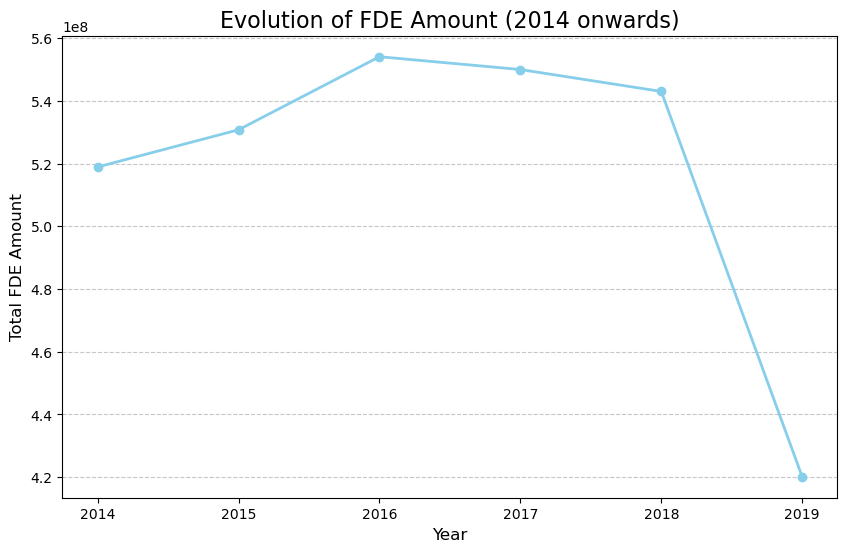

In [30]:
AQUATECH_FDE_evolution = AQUATECH_SEN_new.groupby("YEAR")["FDE_AMT"].sum()


plt.figure(figsize=(10, 6))
AQUATECH_FDE_evolution.plot(kind='line', marker='o', color='skyblue', linewidth=2)

plt.title('Evolution of FDE Amount (2014 onwards)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total FDE Amount', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


**The figure above shows that the Water Development Fund (FDE) of QUATECH Senegal experienced moderate growth until 2017, when the total FDE amount reached its peak, suggesting an increase in revenues.**

**However, starting in 2018, a sharp decline in funds is visible, with a significant drop in 2019, from approximately 5.2 billion to 4.2 billion.**

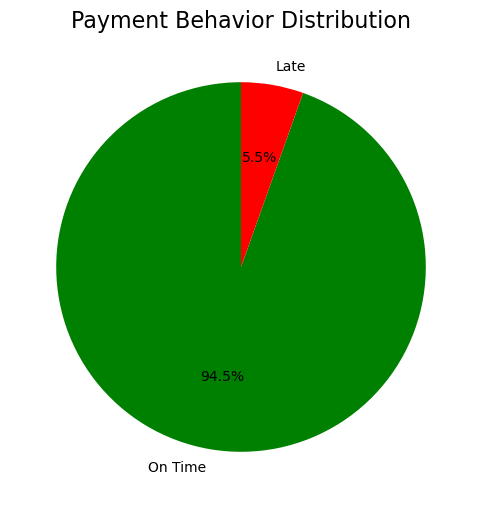

In [31]:
paid_distribution = AQUATECH_SEN_new["PAID"].value_counts()

plt.figure(figsize=(8, 6))
paid_distribution.plot(kind='pie', labels=["On Time", "Late"], autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Payment Behavior Distribution', fontsize=16)
plt.ylabel('')
plt.show()

**We observe that 94.5% of subscribers pay their bills on time. This once again justifies this study, as it seems completely contrary to what one might expect.**

> Many people pay on time (94%), yet the Water Development Fund is decreasing. We wonder whether the 5% who pay late might include the largest consumers.

In [32]:
cross_tab_percentage = pd.crosstab(AQUATECH_SEN_new['CAT'], AQUATECH_SEN_new['PAID'], normalize='index') * 100

# Rename columns for better readability
cross_tab_percentage.columns = ['Pays On Time (%)', 'Pays Late (%)']
cross_tab_percentage.index.name = 'Category'

cross_tab_percentage_rounded = cross_tab_percentage.round(2)
print("\nCrosstab with Rounded Percentages:\n")
print(cross_tab_percentage_rounded)


Crosstab with Rounded Percentages:

          Pays On Time (%)  Pays Late (%)
Category                                 
ADMIN                98.86           1.14
PRIVE                94.43           5.57


In [33]:
# Create a crosstab to analyze the relationship between PAID and CAT
cross_tab = pd.crosstab(AQUATECH_SEN_new['CAT'], AQUATECH_SEN_new['PAID'], margins=True)

# Rename columns for better readability
cross_tab.columns = ['Pays On Time (0)', 'Pays Late (1)', 'Total']
cross_tab.index.name = 'Category'

# Display the crosstab
print(cross_tab)

          Pays On Time (0)  Pays Late (1)    Total
Category                                          
ADMIN                31069            357    31426
PRIVE              1050844          62026  1112870
All                1081913          62383  1144296


Based on this table, we suspect that our major consumers may be among the clients in the administrative or private categories.

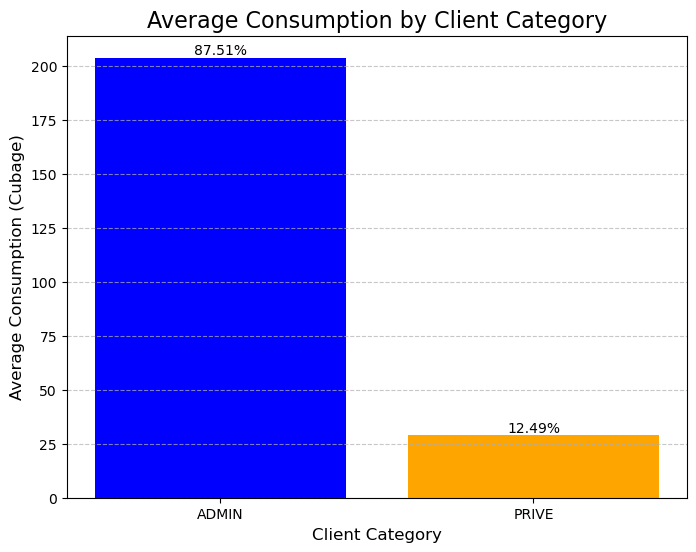

In [34]:
avg_consumption_by_cat = AQUATECH_SEN_new.groupby("CAT")["CONS_CUB"].mean()

# Calculate percentage relative to the total consumption
percentages = (avg_consumption_by_cat / avg_consumption_by_cat.sum()) * 100

# Visualization
plt.figure(figsize=(8, 6))
bars = plt.bar(avg_consumption_by_cat.index, avg_consumption_by_cat, color=['blue', 'orange'])
plt.title('Average Consumption by Client Category', fontsize=16)
plt.xlabel('Client Category', fontsize=12)
plt.ylabel('Average Consumption (Cubage)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage annotations
for bar, pct in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{pct:.2f}%', 
             ha='center', va='bottom', fontsize=10, color='black')

plt.show()

Among QUATECH Senegal's clients, the administration accounts for 87.51% of the water produced.

So far, we do not yet have a clear idea as to why QUATECH Senegal's Water Development Fund is decreasing. Let’s take a look at the distribution of the FDE by geographic area.

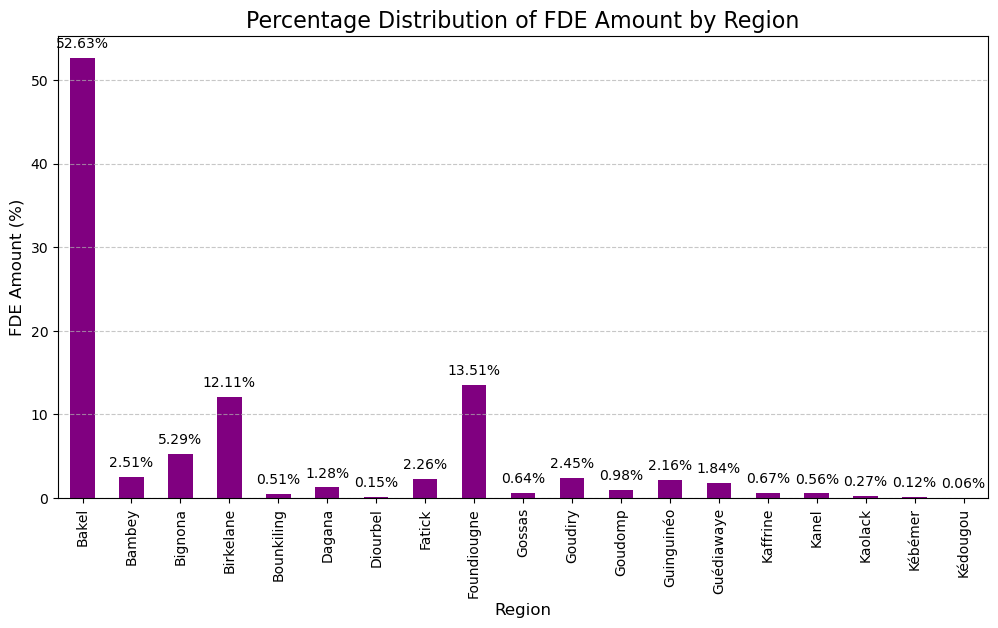

In [35]:
# Calculate the total FDE amount by CENTER in percentage
fde_by_region_percentage = (
    AQUATECH_SEN_new.groupby("CENTER")["FDE_AMT"].sum() / 
    AQUATECH_SEN_new["FDE_AMT"].sum() * 100
)

# Plot the percentage distribution
plt.figure(figsize=(12, 6))
ax = fde_by_region_percentage.plot(kind='bar', color='purple')
plt.title('Percentage Distribution of FDE Amount by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('FDE Amount (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                xytext=(0, 5), 
                textcoords='offset points', 
                ha='center', va='bottom', fontsize=10)

plt.show()

**The clients from Bakel normally contribute 52.6% of QUATECH's Development Fund, Birkelane contributes 12.11%, and Foundiougne contributes 13.51%. This gives us an idea of the geographical areas where we should focus more attention.**

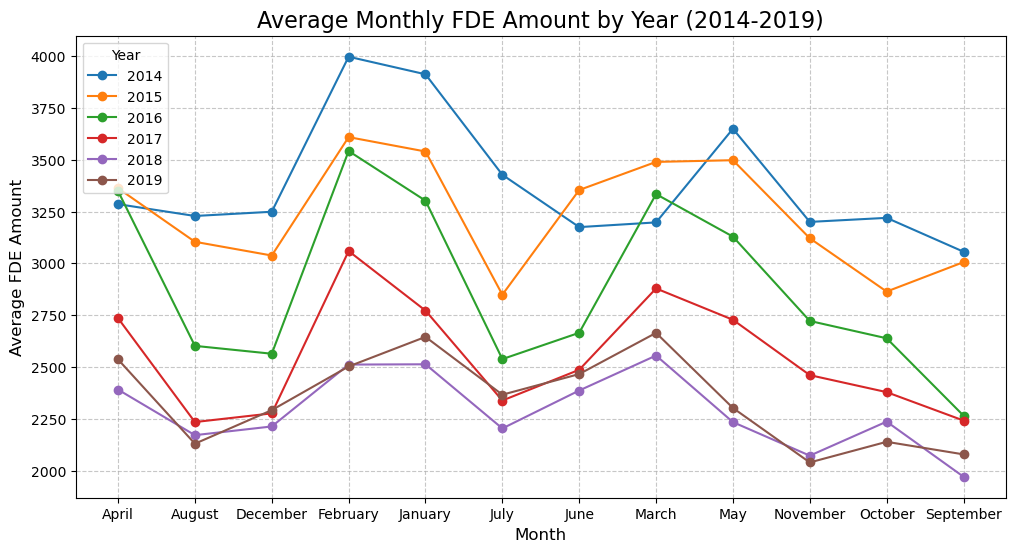

In [36]:
monthly_fde_by_year = AQUATECH_SEN_new.groupby(['YEAR', 'MONTH'])['FDE_AMT'].mean().unstack(level=0)

# Plotting
plt.figure(figsize=(12, 6))

# Plot the average FDE amount for each year
for year in range(2014, 2020):
    if year in monthly_fde_by_year.columns:
        plt.plot(monthly_fde_by_year.index, monthly_fde_by_year[year], marker='o', label=str(year))

# Add labels and title
plt.title('Average Monthly FDE Amount by Year (2014-2019)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average FDE Amount', fontsize=12)
plt.legend(title='Year', loc='upper left', fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


The graph above shows a general upward trend in FDE amounts for certain years, notably in 2014 and 2015, with significant peaks during the months of April and June. In contrast, the years 2018 and 2019 show lower values. The fluctuations from one year to another indicate significant variations in the Water Development Fund's revenue. This once again confirms that there are external factors influencing these amounts, and underscores the need to continue this study.

/tmp/ipykernel_55272/2099510841.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AQUATECH_SEN_no_missing_pay_date['PAYMENT_DELAY'] = (AQUATECH_SEN_no_missing_pay_date['PAY_DATE'] - AQUATECH_SEN_no_missing_pay_date['INV_DATE']).dt.days


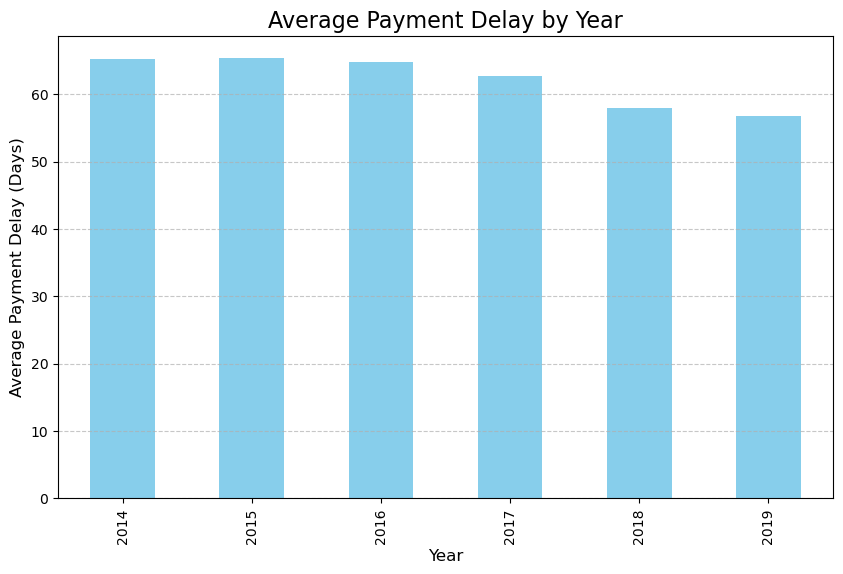

In [37]:
AQUATECH_SEN_no_missing_pay_date = AQUATECH_SEN_new.dropna(subset=['PAY_DATE'])

AQUATECH_SEN_no_missing_pay_date['PAYMENT_DELAY'] = (AQUATECH_SEN_no_missing_pay_date['PAY_DATE'] - AQUATECH_SEN_no_missing_pay_date['INV_DATE']).dt.days

AQUATECH_SEN_no_missing_pay_date = AQUATECH_SEN_no_missing_pay_date.dropna(subset=['PAYMENT_DELAY'])

avg_payment_delay_by_year = AQUATECH_SEN_no_missing_pay_date.groupby('YEAR')['PAYMENT_DELAY'].mean()


plt.figure(figsize=(10, 6))
avg_payment_delay_by_year.plot(kind='bar', color='skyblue')
plt.title('Average Payment Delay by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Payment Delay (Days)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

On average, a customer takes 1 month to pay their water bill in a year.

<div style="
    border: 3px solid #FFA500; 
    border-radius: 12px; 
    padding: 20px; 
    background-color: #FFF8DC; 
    font-size: 16px; 
    color: #333; 
    text-align: left;">
    <h3 style="color: #FFFFFF; font-weight: bold; background-color: #FFA500; padding: 12px; border-radius: 6px; text-align: center;">Summary of our Overview of Billing Dynamics and Consumer Habits</h3>
    <div style="background-color: #FFFFFF; padding: 15px; border-radius: 6px; color: #000;">
        <strong>The analysis of the Water Development Fund (FDE) of QUATECH Senegal shows moderate growth until 2017, followed by a significant decline in revenues starting from 2018, particularly in 2019. Although 94.5% of subscribers pay their bills on time, it is likely that the 5% of late payments are from the largest consumers, mainly in the administrative and private categories.</strong><br>
        <strong>In terms of geographical distribution, the regions of Bakel, Birkelane, and Foundiougne represent 52.6%, 12.11%, and 13.51% of the FDE, highlighting the most contributing areas. While there was an increase in FDE amounts in 2014 and 2015, the following years showed a decrease, suggesting that external factors are influencing the fund's revenues.</strong><br>
        <strong>Additionally, it is important to note that, on average, clients take about one month to pay their water bill, which may explain some fluctuations in the FDE.</strong><br>
        <strong>This situation leads us to question whether there are common patterns among subscribers. Are subscribers who pay on time primarily from Bakel or Birkelane? Have they changed their payment behavior over time?</strong><br>
        <strong>We aim to answer this question by classifying our subscribers based on their payment behavior.</strong>
    </div>
</div>


 ### The typology of QUATECH Senegal's subscribers, based on their consumption and punctuality in bill payments.

> Before proceeding directly to the segmentation of our subscribers, let us first examine the relationships between the various variables in our study.

**In our database, the PAY_DATE variable, which represents the payment date of the invoice, contains 50,330 missing values. However, we have chosen not to remove it immediately, as it is crucial for our study. In this section, as well as for the first model we will simulate, we will remove these 50,330 missing values and work with this subset of the data.**

In [38]:
AQUATECH_SEN_First_Analyse = AQUATECH_SEN_new.dropna(subset=['PAY_DATE'])

We will create the variable PAYMENT_DELAY, which is the difference in days between the invoice issuance date and the payment date.

In [39]:
AQUATECH_SEN_First_Analyse['PAYMENT_DELAY'] = (AQUATECH_SEN_First_Analyse['PAY_DATE'] - AQUATECH_SEN_First_Analyse['INV_DATE']).dt.days

/tmp/ipykernel_55272/1008455481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AQUATECH_SEN_First_Analyse['PAYMENT_DELAY'] = (AQUATECH_SEN_First_Analyse['PAY_DATE'] - AQUATECH_SEN_First_Analyse['INV_DATE']).dt.days


In [40]:
AQUATECH_SEN_First_Analyse['INV_DAY'] = AQUATECH_SEN_First_Analyse['INV_DATE'].dt.day_name()

/tmp/ipykernel_55272/3965699521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AQUATECH_SEN_First_Analyse['INV_DAY'] = AQUATECH_SEN_First_Analyse['INV_DATE'].dt.day_name()


In [41]:
AQUATECH_SEN_First_Analyse['INV_DAY'].unique()

array(['Thursday', 'Friday', 'Tuesday', 'Wednesday', 'Monday', 'Saturday',
       'Sunday'], dtype=object)

In [42]:
object_columns = AQUATECH_SEN_First_Analyse.select_dtypes(include='object').columns

In [43]:
object_columns

Index(['CENTER', 'PERIOD', 'REC_TYPE', 'MONTH', 'CAT', 'INV_DAY'], dtype='object')

In [44]:
dummies = pd.get_dummies(AQUATECH_SEN_First_Analyse[['CENTER', 'PERIOD', 'REC_TYPE', 'MONTH', 'CAT', 'INV_DAY','PAY_DATE','INV_DATE']])

dummies = dummies.drop(['PAY_DATE','INV_DATE'], axis = 1)

In [45]:
Y = AQUATECH_SEN_First_Analyse.FDE_AMT

In [46]:
X_ = AQUATECH_SEN_First_Analyse.drop(['CENTER', 'PERIOD', 'REC_TYPE', 'MONTH', 'CAT', 'INV_DAY', 'PAY_DATE','INV_DATE'], axis = 1).astype('float64')

X = pd.concat([X_, dummies], axis=1)

#### We will perform a PCA to gain insights into the habits of different subscribers.

> As part of this project, we decided to consider variables that contribute at least 30% to the formation of our different axes.

In [47]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)
pca = PCA()
res_pca = pca.fit(data_scaled)
data_pca = pca.transform(data_scaled)

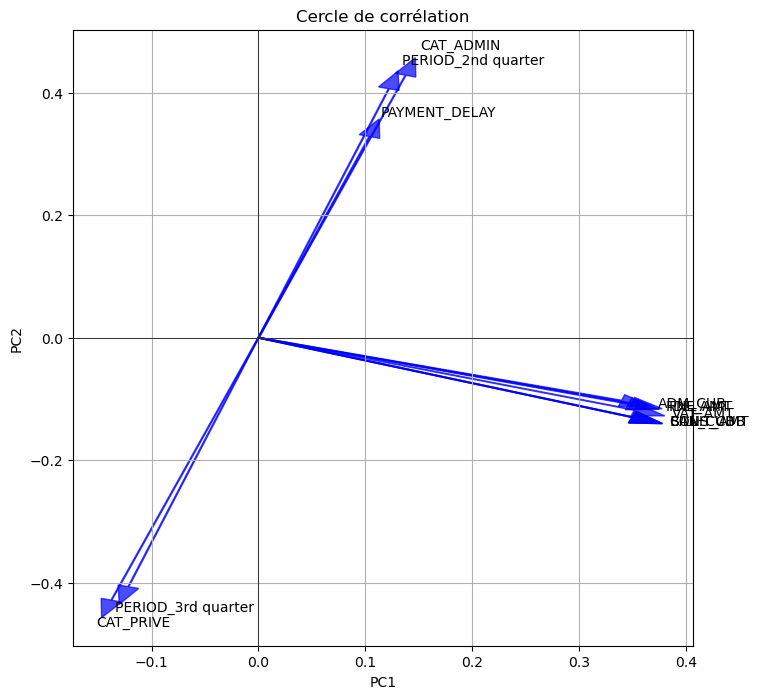

In [48]:
loadings = pd.DataFrame(pca.components_.T, index=X.columns, columns=[f'PC{i+1}' for i in range(len(X.columns))])

important_variables = loadings[(abs(loadings['PC1']) >= 0.3) | (abs(loadings['PC2']) >= 0.3)]
plt.figure(figsize=(8, 8))
for i in range(important_variables.shape[0]):
    plt.arrow(0, 0, important_variables.iloc[i, 0], important_variables.iloc[i, 1],
              color='blue', alpha=0.7, head_width=0.02)
    plt.text(important_variables.iloc[i, 0] * 1.1, important_variables.iloc[i, 1] * 1.1, important_variables.index[i], color='black')
plt.title('Cercle de corrélation')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid()
plt.show()

On axis 1, we observe that the variables "Consumed cubage", "Billed cubage", "Administrative cubage", and "VAT amount" have similar and high contributions. These variables primarily reflect consumption in terms of volume as well as the costs associated with taxes.

Axis 2 is mainly related to payment habits. It shows that members of the administration generally take longer to settle their payments but often prefer to make their payments during the second half of each year. In contrast, private sector subscribers pay their bills more quickly, usually during the third semester of the year.

## Identification of factors influencing the development fund of the company QUATECH Senegal

<div style="
    border: 3px solid #FF0000; 
    border-radius: 10px; 
    padding: 15px; 
    background-color: #FFE6E6; 
    font-size: 16px; 
    color: #333; 
    text-align: left;">
    <h3 style="color: #FFFFFF; font-weight: bold; background-color: #FF0000; padding: 10px; border-radius: 5px; text-align: center;">★★★ Urgent: Data Preparation for Model Execution ★★★</h3>
    <div style="background-color: #FFFFFF; padding: 10px; border-radius: 5px; font-weight: bold; color: #000;">
        We pay close attention to data preparation to ensure optimal model execution. Since our model requires data in Numpy format, we convert it before training. We adopt a progressive approach: an initial training with a learning rate of 0.001 to test stability, followed by re-importing and reprocessing the data before a second training with a different learning rate.
    </div>
</div>


**We will split our data int validation train set, training set and test set**

In [66]:

AQUATECH_SEN_new['PAY_DATE'] = pd.to_datetime(AQUATECH_SEN_new['PAY_DATE'], errors='coerce')


object_columns = AQUATECH_SEN_new.select_dtypes(include='object').columns
dummies = pd.get_dummies(AQUATECH_SEN_new[['CENTER', 'PERIOD', 'REC_TYPE', 'MONTH', 'CAT','PAY_DATE','INV_DATE']])

dummies = dummies.drop(['PAY_DATE','INV_DATE'], axis = 1)

Y = AQUATECH_SEN_new.FDE_AMT
X_ = AQUATECH_SEN_new.drop(['CENTER', 'PERIOD', 'REC_TYPE', 'MONTH', 'CAT', 'PAY_DATE','INV_DATE'], axis = 1).astype('float64')

X = pd.concat([X_, dummies], axis=1)

In [67]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [81]:
X_train_2 = X_train

In [68]:
mean_y = y_train.mean()
y_train = y_train - mean_y
y_valid = y_valid - mean_y
y_test = y_test - mean_y

In [69]:
X_train = X_train.to_numpy()
X_valid = X_valid.to_numpy()
X_test = X_test.to_numpy()

In [70]:
y_train = y_train.to_numpy()
y_valid = y_valid.to_numpy()
y_test = y_test.to_numpy()

In [71]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_valid = X_valid.astype('float32')
y_valid = y_valid.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

> We will use MirroredStrategy for the computations due to the large size of the dataset. MirroredStrategy allows for the distribution of training calculations across multiple GPUs by replicating the model on each device and splitting the training data between the available GPUs.

> The gradients are computed locally on each device (GPU) and then aggregated (mirrored) to update the model weights in a synchronized manner. This strategy is particularly useful when you have a large dataset and multiple GPUs available, as it accelerates training by distributing the workload.

#### Let's build and configurate the model

### Learning Rate 0,01

In [72]:
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
norm_layer.adapt(X_train)

/home/liwa/anaconda3/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Ridge

In [73]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)
ridge_rms = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
ridge_correlation = np.corrcoef(y_test, y_pred_ridge)[0, 1]

print(f'RMS de Ridge: {ridge_rms}')
print(f'Coefficient de corrélation de Ridge: {ridge_correlation}')


RMS de Ridge: 7.018590450286865
Coefficient de corrélation de Ridge: 0.9999999881138771


# Lasso

In [74]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)
lasso_rms = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
lasso_correlation = np.corrcoef(y_test, y_pred_lasso)[0, 1]

print(f'RMS de Lasso: {lasso_rms}')
print(f'Coefficient de corrélation de Lasso: {lasso_correlation}')

RMS de Lasso: 2778.4033203125
Coefficient de corrélation de Lasso: 0.9940206668732164


# Neural network model training before variable selection

In [75]:
from sklearn.neural_network import MLPRegressor

# Construction du modèle
mlp = MLPRegressor(hidden_layer_sizes=(100, 50, 25), activation='relu', max_iter=1000, learning_rate_init=0.01)

# Entraînement du modèle
mlp.fit(X_train, y_train)


MLPRegressor(hidden_layer_sizes=(100, 50, 25), learning_rate_init=0.01,
             max_iter=1000)

# Evaluation du modele

In [76]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Prédiction sur les ensembles d'entraînement et de validation
y_pred_train = mlp.predict(X_train)
y_pred_val = mlp.predict(X_valid)

# Calcul de la RMS
train_rms = np.sqrt(mean_squared_error(y_train, y_pred_train))
val_rms = np.sqrt(mean_squared_error(y_valid, y_pred_val))

print(f'RMS sur l\'ensemble d\'entraînement: {train_rms}')
print(f'RMS sur l\'ensemble de validation: {val_rms}')


RMS sur l'ensemble d'entraînement: 26214.07421875
RMS sur l'ensemble de validation: 30009.43359375


# Visualisation de la fonction cout

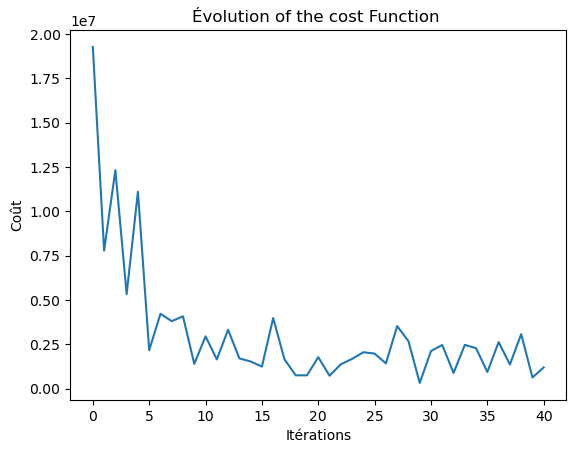

In [100]:
import matplotlib.pyplot as plt

# Trace de la courbe de perte pendant l'entraînement
plt.plot(mlp.loss_curve_)
plt.title('Évolution of the cost Function ')
plt.xlabel('Itérations')
plt.ylabel('Coût')
plt.show()


# Visualisation des Valeurs "Vraies" et Prédites

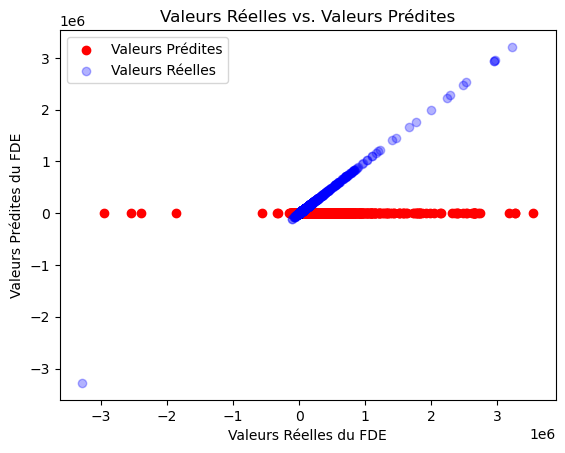

In [78]:
import matplotlib.pyplot as plt

# Nuage de points avec les valeurs réelles en bleu et les valeurs prédites en rouge
plt.scatter( y_train, y_pred_train, color='red', label='Valeurs Prédites')
plt.scatter(y_test, y_test, color='blue', alpha=0.3, label='Valeurs Réelles')
plt.xlabel('Valeurs Réelles du FDE')
plt.ylabel('Valeurs Prédites du FDE')
plt.title('Valeurs Réelles vs. Valeurs Prédites')
plt.legend()
plt.show()


# Choix des variables 

In [93]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialisation du modèle
model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X_train, y_train)

# Variables sélectionnées
print("Variables sélectionnées:", fit.support_)
print("Ranking des variables:", fit.ranking_)


Variables sélectionnées: [ True False False  True False False False False False  True False False
  True False False False False  True False False False False False False
 False False False False False False False False False False False  True
  True  True False  True False False False False False False  True False
 False False False False False False False False]
Ranking des variables: [ 1 15 19  1 33 21 22 23 24  1 32 40  1 44 47 37 46  1 30 35 18  6  8 20
 27  4 38 14 36 12 25  9  5  2  7  1  1  1 13  1 28 16 39 11 45 43  1 10
 17 31 42 34 41  3 26 29]


# apres selection des variables

# Comparaison

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

# Sélection des variables pertinentes
selected_features = AQUATECH_SEN_new[['CONS_CUB', 'BILL_CUB', 'NORM_CUB', 'DOM_CUB', 'IND_CUB', 'ADM_CUB', 'VAT_AMT', 'FNE_AMT', 'SANIT_AMT']]
target = AQUATECH_SEN_new['FDE_AMT']

# Normalisation des variables
scaler = StandardScaler()
features_scaled = scaler.fit_transform(selected_features)

# Division des données
X_train, X_temp, y_train, y_temp = train_test_split(features_scaled, target, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Modèle Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
ridge_rms = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f'RMS de Ridge: {ridge_rms}')


# Modèle Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
lasso_rms = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print(f'RMS de Lasso: {lasso_rms}')

RMS de Ridge: 13.119827364752961
RMS de Lasso: 429.9835419410218


/home/liwa/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.136e+10, tolerance: 4.954e+10
  model = cd_fast.enet_coordinate_descent(


# Entrainement du modele de reseaux de neurones 

In [96]:
# Entrainement du modele de reseaux de neurones
from sklearn.neural_network import MLPRegressor

# Construction du modèle
mlp = MLPRegressor(hidden_layer_sizes=(100, 50, 25), activation='relu', max_iter=1000, learning_rate_init=0.01)

# Entraînement du modèle
mlp.fit(X_train, y_train)


MLPRegressor(hidden_layer_sizes=(100, 50, 25), learning_rate_init=0.01,
             max_iter=1000)

# Evaluation of the model

In [97]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Prédiction sur les ensembles d'entraînement et de validation
y_pred_train = mlp.predict(X_train)
y_pred_val = mlp.predict(X_val)

# Calcul de la RMS
train_rms = np.sqrt(mean_squared_error(y_train, y_pred_train))
val_rms = np.sqrt(mean_squared_error(y_val, y_pred_val))

print(f'RMS sur l\'ensemble d\'entraînement: {train_rms}')
print(f'RMS sur l\'ensemble de validation: {val_rms}')


RMS sur l'ensemble d'entraînement: 1149.1024155345244
RMS sur l'ensemble de validation: 1352.6805732422054


# Visualisation of the cost function 

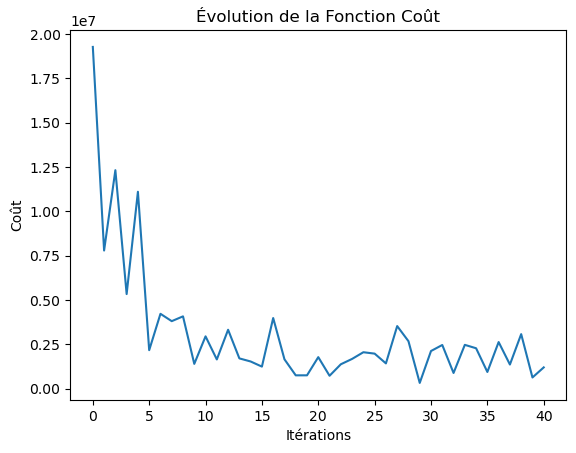

In [98]:
import matplotlib.pyplot as plt

# Trace de la courbe de perte pendant l'entraînement
plt.plot(mlp.loss_curve_)
plt.title('Évolution de la Fonction Coût')
plt.xlabel('Itérations')
plt.ylabel('Coût')
plt.show()


# Visualisation des Valeurs "Vraies" et Prédites

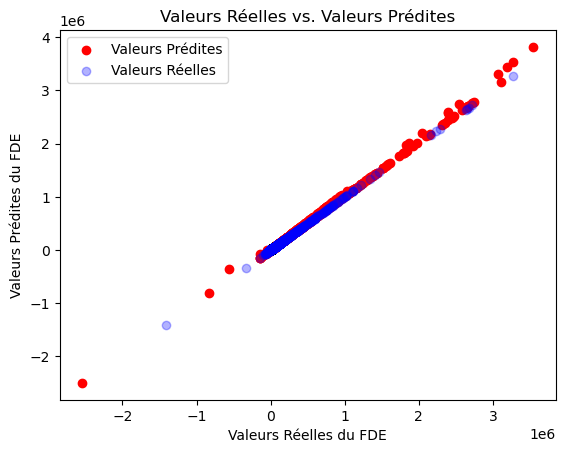

In [99]:
import matplotlib.pyplot as plt

# Nuage de points avec les valeurs réelles en bleu et les valeurs prédites en rouge
plt.scatter( y_train, y_pred_train, color='red', label='Valeurs Prédites')
plt.scatter(y_test, y_test, color='blue', alpha=0.3, label='Valeurs Réelles')
plt.xlabel('Valeurs Réelles du FDE')
plt.ylabel('Valeurs Prédites du FDE')
plt.title('Valeurs Réelles vs. Valeurs Prédites')
plt.legend()
plt.show()


## Recommandation

<div style="
    border: 3px solid #C0C0C0; 
    border-radius: 10px; 
    padding: 15px; 
    background-color: #F8F9FA; 
    font-size: 16px; 
    text-align: left;">

### **RECOMMENDATIONS**

Following our analysis, we make the following recommendations for QUATECH Senegal to strengthen the management and efficiency of the Water Development Fund (FDE).

1. **Regarding revenue improvement**  
   It is essential to target major contributors, particularly administrative consumers, who represent **87.51% of water production**, with rigorous payment monitoring and the introduction of incentive mechanisms such as specific contracts and automatic reminders to reduce delays.

2. **In terms of segmentation**  
   An in-depth regional analysis should be conducted to target high-contributing areas such as **Bakel, Birkelane, and Foundiougne**, while optimizing local infrastructures. The adoption of predictive tools based on regression models and neural networks will also help anticipate revenue declines and manage the risks of late payments.

3. **Awareness campaigns**  
   It is crucial to launch campaigns to educate subscribers on the importance of regular payments, clearly explaining the role of the FDE.

4. **Diversifying funding sources**  
   Exploring new avenues such as grants from institutional partners and the introduction of additional services, such as filtration solutions, are recommended.

5. **Effective data management**  
   Advanced data management should enable more detailed analyses for better understanding subscriber behavior and informed decision-making, with reporting systems allowing real-time tracking of FDE performance.

</div>


# Conclusion

In conclusion, through this analysis and the proposed recommendations, we aim to strengthen the management and efficiency of the Water Development Fund (FDE) for QUATECH Senegal. The suggested actions focus on improving revenue by closely monitoring key contributors and introducing incentive mechanisms to reduce payment delays. At the same time, more precise segmentation and in-depth regional analysis will allow us to target high-contributing areas while optimizing infrastructures. The adoption of predictive tools and the implementation of awareness campaigns will enhance risk management and encourage subscribers to make regular payments. Furthermore, diversifying funding sources and introducing additional services, such as filtration solutions, will offer new growth opportunities. Finally, advanced data management will enable better analysis of subscriber behavior, thus facilitating informed decision-making and precise tracking of FDE performance. Once implemented, these initiatives are expected to ensure the sustainability and efficiency of water infrastructure financing.